In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
 training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 18345 files belonging to 10 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 4585 files belonging to 10 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[159.25 148.25 162.25]
   [160.   149.   163.  ]
   [160.75 149.75 163.75]
   ...
   [125.75 113.75 127.75]
   [111.5   99.5  113.5 ]
   [119.25 107.25 121.25]]

  [[150.5  139.5  153.5 ]
   [155.75 144.75 158.75]
   [167.75 156.75 170.75]
   ...
   [127.5  115.5  129.5 ]
   [144.5  132.5  146.5 ]
   [137.25 125.25 139.25]]

  [[157.25 146.25 160.25]
   [153.5  142.5  156.5 ]
   [163.   152.   166.  ]
   ...
   [131.75 119.75 133.75]
   [107.    95.   109.  ]
   [116.   104.   118.  ]]

  ...

  [[169.5  159.5  170.5 ]
   [185.5  175.5  186.5 ]
   [161.5  151.5  162.5 ]
   ...
   [128.25 116.25 128.25]
   [143.   131.   143.  ]
   [134.25 122.25 134.25]]

  [[159.   149.   160.  ]
   [158.5  148.5  159.5 ]
   [179.   169.   180.  ]
   ...
   [140.   128.   140.  ]
   [118.25 106.25 118.25]
   [126.75 114.75 126.75]]

  [[154.5  144.5  155.5 ]
   [162.75 152.75 163.75]
   [169.25 159.25 170.25]
   ...
   [138.75 126.75 138.75]
   [136.25 124.25 136.25]
   [120.   108.   12

In [78]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [79]:
model = Sequential()

In [80]:
# Building Convulation layer
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',activation='relu',input_shape = [128,128,3]))
model.add(Conv2D(filters = 32,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [81]:
model.add(Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation='relu'))
model.add(Conv2D(filters = 64,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [82]:
model.add(Conv2D(filters = 128,kernel_size = 3,padding = 'same',activation='relu'))
model.add(Conv2D(filters = 128,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [83]:
model.add(Conv2D(filters = 256,kernel_size = 3,padding = 'same',activation='relu'))
model.add(Conv2D(filters = 256,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [84]:
model.add(Conv2D(filters = 512,kernel_size = 3,padding = 'same',activation='relu'))
model.add(Conv2D(filters = 512,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [85]:
model.add(Dropout(0.25)) #To avoid Overfitting

In [86]:
model.add(Flatten())

In [87]:
model.add(Dense(units = 1500,activation = 'relu'))

In [88]:
model.add(Dropout(0.4))

In [89]:
# Output Layer
model.add(Dense(units=10,activation='softmax'))

In [90]:
# Compiling Model  # Helps in model overshooting
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
model.summary()  # traing parameters are now only 29mb from 281mb so training speed is boosted rapidly

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          15,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model_accuracy = model.fit(x=training_set,validation_data = validation_set,epochs=10)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 231s 397ms/step - accuracy: 0.3895 - loss: 1.7191 - val_accuracy: 0.7529 - val_loss: 0.6903
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 245s 428ms/step - accuracy: 0.7960 - loss: 0.5837 - val_accuracy: 0.8201 - val_loss: 0.5449
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 246s 429ms/step - accuracy: 0.8572 - loss: 0.4137 - val_accuracy: 0.8822 - val_loss: 0.3448
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 248s 432ms/step - accuracy: 0.9019 - loss: 0.2828 - val_accuracy: 0.9069 - val_loss: 0.2748
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 246s 429ms/step - accuracy: 0.9253 - loss: 0.2131 - val_accuracy: 0.9226 - val_loss: 0.2277
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 249s 433ms/step - accuracy: 0.9370 - loss: 0.1834 - val_accuracy: 0.9291 - val_loss: 0.2049
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 260s 453ms/step - accuracy: 0.9558 - loss: 0.1331 - val_accuracy: 0.9298 - val_loss: 0.2146
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 267s 465ms/step - accuracy: 0.9637 -

In [93]:
train_loss , train_accuracy = model.evaluate(training_set)

574/574 ━━━━━━━━━━━━━━━━━━━━ 54s 95ms/step - accuracy: 0.9756 - loss: 0.0671


In [94]:
print(train_loss,train_accuracy)

0.060721904039382935 0.9776505827903748


In [95]:
val_loss , val_accuracy = model.evaluate(validation_set)

144/144 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9385 - loss: 0.1757


In [96]:
print(val_loss,val_accuracy)

0.18326953053474426 0.9398037195205688


In [98]:
model.save("trained_model.keras")

In [99]:
model_accuracy.history

{'accuracy': [0.5698010325431824,
  0.819351315498352,
  0.8711365461349487,
  0.9111474752426147,
  0.930607795715332,
  0.9475606679916382,
  0.9552466869354248,
  0.9659307599067688,
  0.9713818430900574,
  0.9737803339958191],
 'loss': [1.2255680561065674,
  0.5217311382293701,
  0.36781367659568787,
  0.25555986166000366,
  0.19950732588768005,
  0.1549556851387024,
  0.13023245334625244,
  0.10234363377094269,
  0.08350734412670135,
  0.07574654370546341],
 'val_accuracy': [0.75288987159729,
  0.820065438747406,
  0.8822246193885803,
  0.9068702459335327,
  0.9225736260414124,
  0.9291166663169861,
  0.9297710061073303,
  0.934569239616394,
  0.9197382926940918,
  0.9398037195205688],
 'val_loss': [0.690290629863739,
  0.5448518395423889,
  0.34480467438697815,
  0.2747712731361389,
  0.22774502635002136,
  0.20487511157989502,
  0.2146391123533249,
  0.19765810668468475,
  0.26149043440818787,
  0.18326954543590546]}

In [100]:
import json
with open("training_hist.json","w") as f:
    json.dump(model_accuracy.history,f)

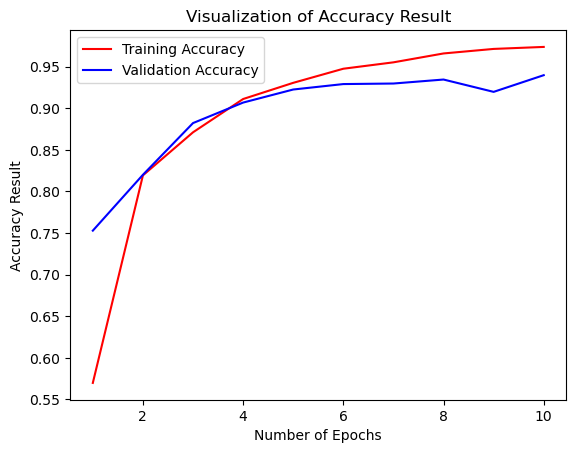

In [105]:
# Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,model_accuracy.history['accuracy'],color = 'red',label = 'Training Accuracy')
plt.plot(epochs,model_accuracy.history['val_accuracy'],color = 'blue',label = 'Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [106]:
class_name = validation_set.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [107]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 4585 files belonging to 10 classes.


In [108]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

144/144 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step


(array([[9.9952626e-01, 2.6198014e-04, 1.0544129e-06, ..., 1.8831360e-04,
         1.1474927e-09, 2.7270136e-08],
        [9.9999845e-01, 6.8696767e-07, 7.8732159e-09, ..., 8.2371673e-07,
         2.8161371e-12, 1.1044960e-10],
        [9.9999928e-01, 5.9311532e-07, 1.9764837e-08, ..., 1.3179000e-07,
         5.9134993e-12, 5.0308507e-10],
        ...,
        [1.7593878e-08, 5.8034810e-10, 2.8199800e-06, ..., 1.0693777e-09,
         5.4589862e-09, 9.9997330e-01],
        [2.7488925e-10, 3.1684642e-12, 4.2883556e-08, ..., 5.8161934e-12,
         2.7438574e-11, 9.9999952e-01],
        [1.2809337e-10, 2.1870034e-13, 2.4891455e-07, ..., 4.2666361e-12,
         3.3742040e-11, 9.9999952e-01]], dtype=float32),
 (4585, 10))

In [109]:
predicted_categories = tf.argmax(y_pred,axis=1) ## returns the index of the maximun probability class in column-wise fashion
predicted_categories

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [110]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(4585, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [113]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
classification_report(Y_true,predicted_categories,target_names=class_name)

'                                               precision    recall  f1-score   support\n\n                      Tomato___Bacterial_spot       0.96      0.97      0.96       425\n                        Tomato___Early_blight       0.85      0.97      0.91       480\n                         Tomato___Late_blight       0.98      0.94      0.95       463\n                           Tomato___Leaf_Mold       0.99      0.92      0.95       470\n                  Tomato___Septoria_leaf_spot       0.92      0.85      0.88       436\nTomato___Spider_mites Two-spotted_spider_mite       0.98      0.84      0.90       435\n                         Tomato___Target_Spot       0.84      0.95      0.89       457\n       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.98      0.98       490\n                 Tomato___Tomato_mosaic_virus       0.95      1.00      0.97       448\n                             Tomato___healthy       0.99      0.98      0.98       481\n\n                           

In [118]:
cm = confusion_matrix(Y_true,predicted_categories)
cm
cm.shape

(10, 10)

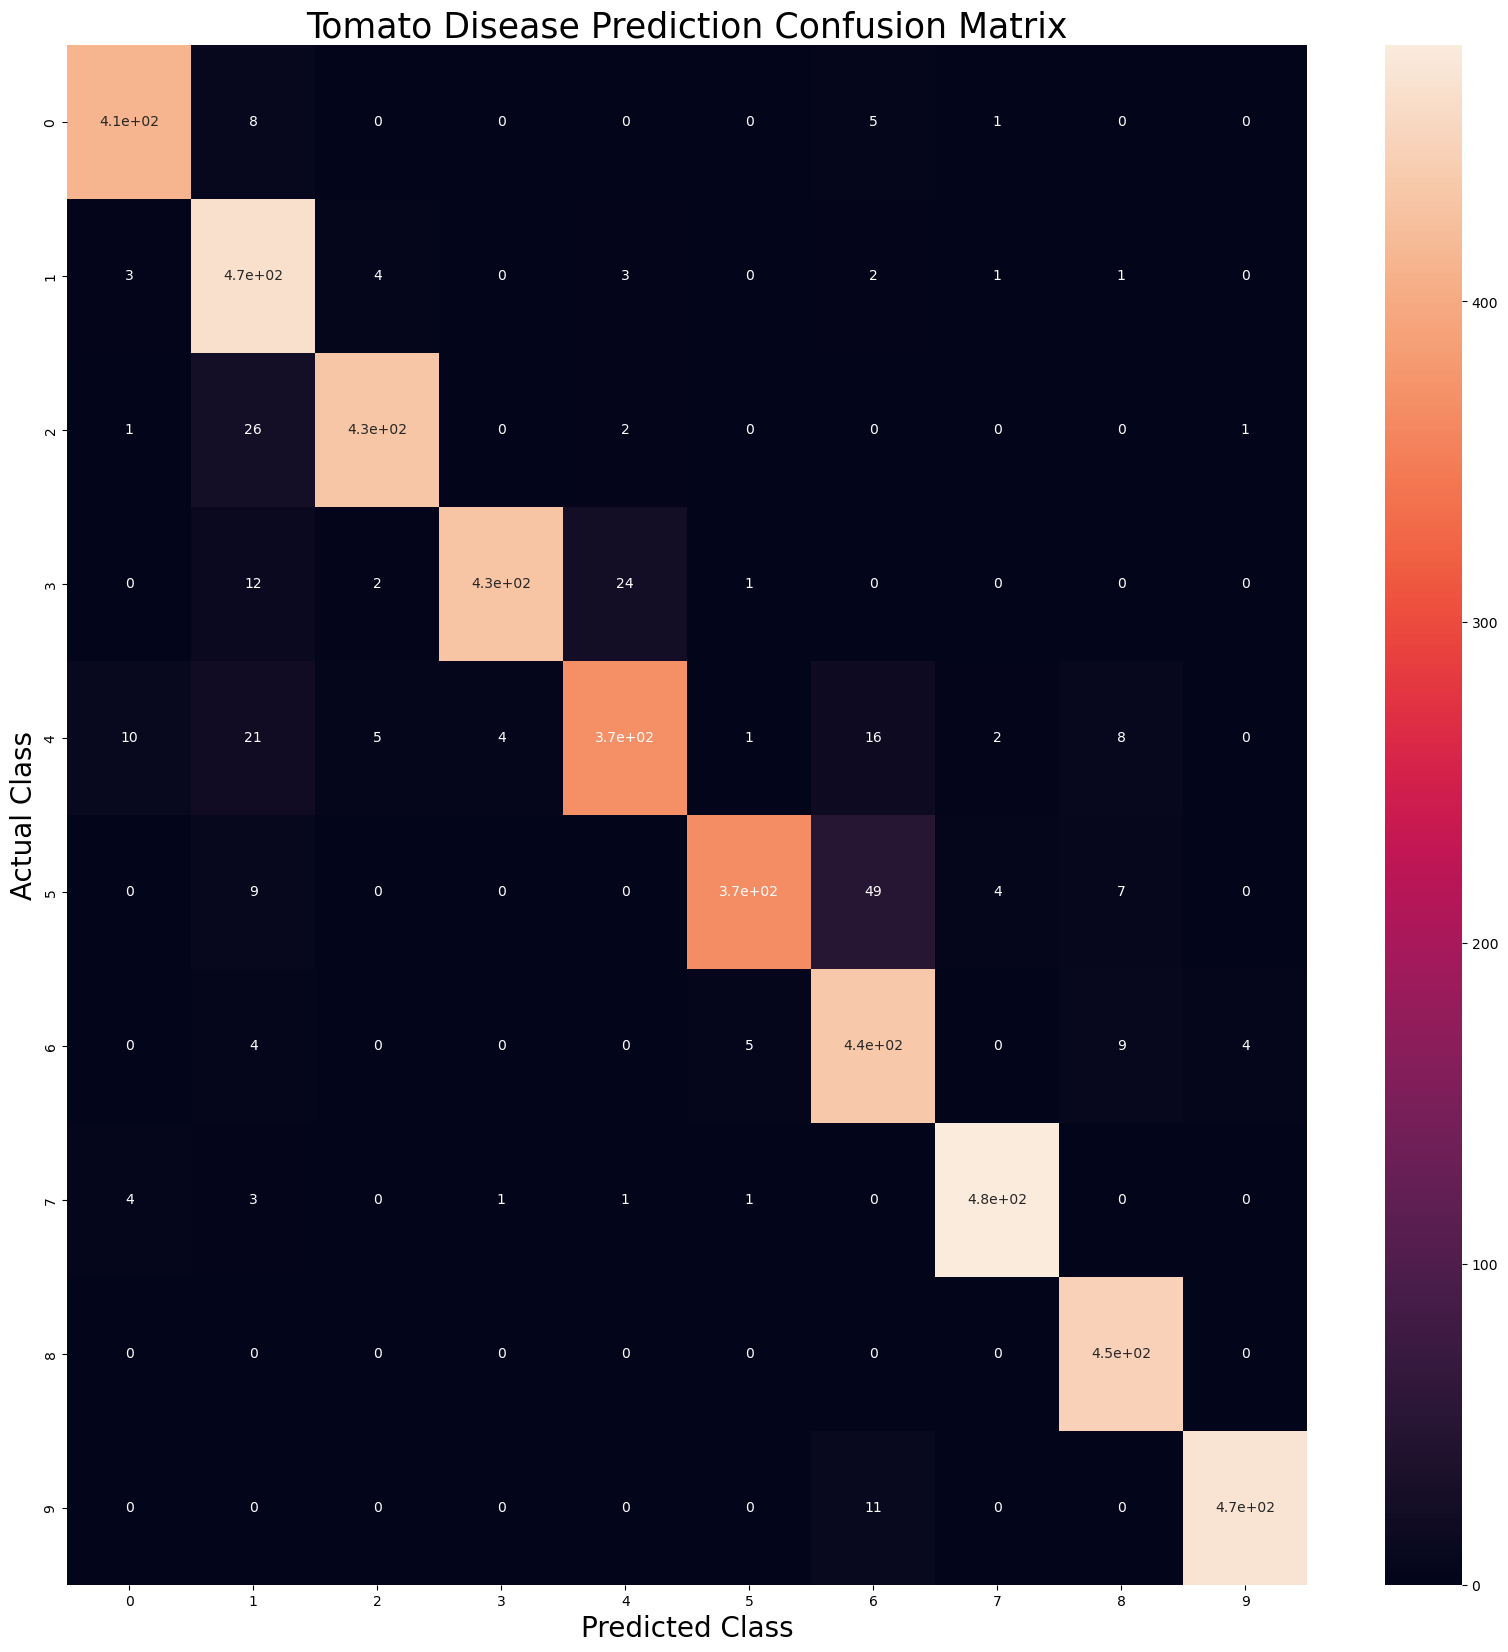

In [127]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Tomato Disease Prediction Confusion Matrix",fontsize = 25)
plt.show()